In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import re

In [3]:
def parse_data(file_path):
    with open(file_path, 'r') as file:
        file_content = file.read()

    pattern = re.compile(r"Experiment completed with best_time: (?P<best_time>\d+\.\d+) median_time: (?P<median_time>\d+\.\d+) and mean time: (?P<mean_time>\d+\.\d+). The success rate was: (?P<success_rate>\d+\.\d+). Parameters: algo: (?P<algo>\w+), max_vel: (?P<max_vel>\d+\.\d+), max_acc: (?P<max_acc>\d+\.\d+), checkpoint_offset: (?P<checkpoint_offset>\d+\.\d+)  can_pass_gate: (?P<can_pass_gate>\w+)")
    # Parse the content using the regular expression
    matches = pattern.finditer(file_content)

    # Convert the matches to a list of dictionaries
    data = []
    for match in matches:
        match = match.groups()
        data.append({
            "best_time": float(match[0]),
            "median_time": float(match[1]),
            "mean_time": float(match[2]),
            "success_rate": float(match[3]),
            "algo": match[4],
            "max_vel": float(match[5]),
            "max_acc": float(match[6]),
            "checkpoint_offset": float(match[7]),
            "can_pass_gate": match[8] == "True"
        })

    # Create a DataFrame from the parsed data
    df = pd.DataFrame(data)
    return data, df

In [2]:
def parse_data(file_path):
    with open(file_path, 'r') as file:
        file_content = file.read()

    pattern = re.compile(
    r"Experiment completed with best_time: (?P<best_time>[0-9.]+) "
    r"median_time: (?P<median_time>[0-9.]+), mean time: (?P<mean_time>[0-9.]+) "
    r"and std time: (?P<std_time>[0-9.]+)\. The success rate was: (?P<success_rate>[0-9.]+)\. "
    r"Parameters: max_vel: (?P<max_vel>[0-9.]+), max_acc: (?P<max_acc>[0-9.]+)"
)

    # Parse the content using the regular expression
    matches = pattern.finditer(file_content)

    # Convert the matches to a list of dictionaries
    data = []
    for match in matches:
        match = match.groups()
        data.append({
            "best_time": float(match[0]),
            "median_time": float(match[1]),
            "mean_time": float(match[2]),
            "std_time": float(match[3]),
            "success_rate": float(match[4]),
            "max_vel": float(match[5]),
            "max_acc": float(match[6]),
        })

    # Create a DataFrame from the parsed data
    df = pd.DataFrame(data)
    return data, df
    

In [4]:
#file_path = "level_3_comparison/hp_search_optimal.log"
file_path = "level_1_comparison/hp_search_optimal.log"
data, df = parse_data(file_path)

In [9]:
min_acceptance_threshold = 0.72
df = df[df["success_rate"] >= min_acceptance_threshold]

# get setup with best mean time
best_mean_time = df[df["mean_time"] == df["mean_time"].min()].iloc[0]
print(best_mean_time)

best_time             9.166667
median_time              10.55
mean_time            10.619048
success_rate               0.7
algo                       rrt
max_vel               3.860718
max_acc               1.935899
checkpoint_offset          0.1
can_pass_gate             True
Name: 51, dtype: object


Text(0.5, 1.0, 'Best time vs Mean time')

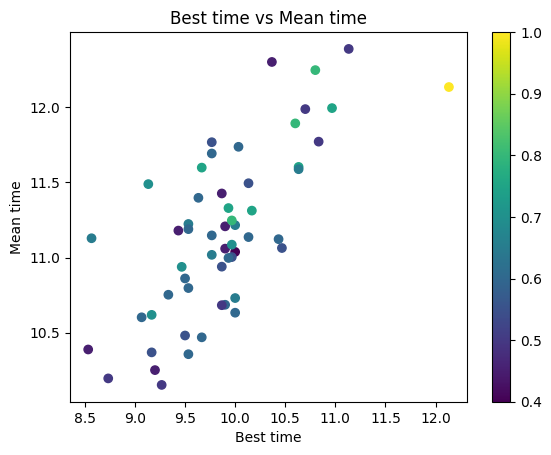

In [5]:
best_times = df["best_time"]
median_times = df["median_time"]
mean_times = df["mean_time"]
success_rates = df["success_rate"]

# Plot the best times over median times, color by success rate
plt.figure()
plt.scatter(best_times, mean_times, c=success_rates, cmap='viridis')
plt.colorbar()
plt.xlabel("Best time")
plt.ylabel("Mean time")
plt.title("Best time vs Mean time")


Text(0.5, 1.0, 'Best time vs Mean time')

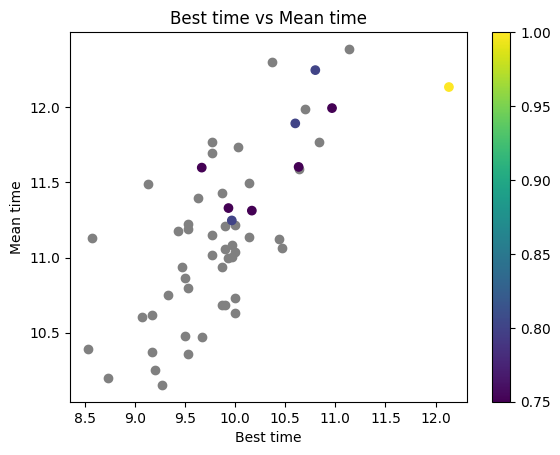

In [6]:
# plot the same plot as before, however color all points with success rate belo threshold gray, all above threshold with viridis
plt.figure()
success_rathe_threshold = 0.7
success_idx = success_rates > success_rathe_threshold
plt.scatter(best_times[~success_idx], mean_times[~success_idx], c='gray')
plt.scatter(best_times[success_idx], mean_times[success_idx], c=success_rates[success_idx], cmap='viridis')
plt.colorbar()
plt.xlabel("Best time")
plt.ylabel("Mean time")
plt.title("Best time vs Mean time")


Text(0.5, 1.0, 'Best time vs Mean time')

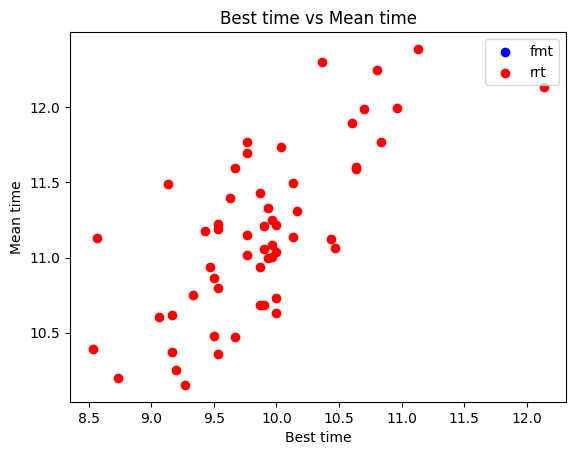

In [7]:
plt.figure()
algos = df["algo"]
filter = algos == "fmt"
plt.scatter(best_times[filter], mean_times[filter], c='blue')
plt.scatter(best_times[~filter], mean_times[~filter], c='red')
plt.legend(["fmt", "rrt"])
plt.xlabel("Best time")
plt.ylabel("Mean time")
plt.title("Best time vs Mean time")

Text(0.5, 1.0, 'Best time vs Mean time')

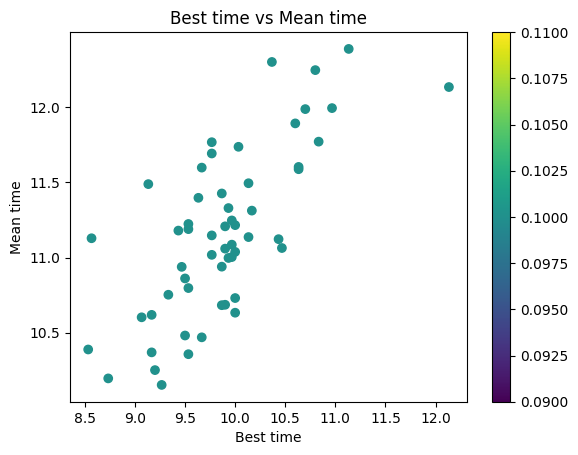

In [8]:
plt.figure()
checkpoint_offset = df["checkpoint_offset"]
plt.scatter(best_times, mean_times, c=checkpoint_offset, cmap='viridis')
plt.colorbar()
plt.xlabel("Best time")
plt.ylabel("Mean time")
plt.title("Best time vs Mean time")